<a href="https://colab.research.google.com/github/Dak-lin-e/-/blob/main/PyTorch_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 이미지데이터는 0~1 값을 가지는 고정크기의 28 x 28행렬이다. 각 행렬의 원소는 픽셀의 밝기정보를 나타낸다.
# 1에 가까울수록 흰색, 0에 가까울수록 검은색 , 레이블은 원핫인코딩 방식으로 길이가 10인 벡터로 이루어져있음.
# mnist데이터는 3차원데이터 (channel , width, height)로 나타냄. channel은 RGB 3채널을 사용함.

In [2]:
# CNN 으로 손글씨 숫자이미지 분류하기

# 1. 모듈 및 분석 환경설정
# 2. 데이터 불러오기
# 3. 모델 학습
# 4. 모델 평가

In [13]:
# 모듈 불러오기
import torch      # pytorch 라이브러리 torch를 가져옴
import torch.nn as nn         # 딥러닝 네트워크의 기본구성요소를 포함한 torch.nn 모듈을 nn으로 지정하여 불러옴.
import torch.nn.functional as F       # 딥러닝에 자주사용되는 함수가 포함된 모듈 torch.nn.functional 을 F로 지정하여 불러옴.
import torch.optim as optim           # 가중치 추정에 필요한 최적화 알고리즘을 포함한 torch.optim 모듈을 optim으로 지정하여 불러옴.
from torchvision import datasets, transforms      # torchvision 모듈은 딥러닝에서 자주 사용되는 데이터셋,모델구조,이미지변환기술을 포함하는 중. 그중 , datasets, transforms 함수만 불러옴.

from matplotlib import pyplot as plt # 데이터와 차트의 시각화를 돕는 matplotlib 모듈에서  pyplot함수를 plt로 불러옴.
#%matplotlib inline      # 주피터노트북 사용자는 코드실행 시 브라우저에서 바로 그림을 보려면 꼭 필요한 코드.

In [4]:
# 분석환경설정

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is ', device)

# 가중치 업데이트연산과정에서 어떤 장비를 선택할지에대한 코드.
# CUDA를 통해 GPU를 사용할 수 있다면 torch.cuda.is.available()에 True값이, 아니면 False값이 저장된다. 이에따라, device에 'cuda' 혹은 'cpu'로 설정됨.

Current cuda device is  cpu


In [7]:
# 하이퍼파라미터 지정
batch_size = 50   # 모델가중치를 한번 업데이트 시킬 때 사용되는 샘플단위개수
epoch_num=15      # 학습데이터를 모두 사용하여 학습하는 기본단위횟수
learning_rate = 0.0001    #가중치 업데이트의 정도

In [8]:
# 데이터 불러오기
train_data = datasets.MNIST(root ='./data', train=True, download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root ='./data', train=False, download=True,
                            transform=transforms.ToTensor())

print('number of training data: ' , len(train_data))
print('number of test data: ', len(test_data))

# root : Mnist 데이터를 저장할 물리적공간위치 지정
# train : True , False 논리값으로 데이터를 학습용으로 사용할 것인지 지정
# download : True를 입력하면 root옵션에서 지정된 위치에 데이터가 저장됨. 만약 처음 시행이 아니고 이미 저장된 데이터가 있다면 False를 입력
# transform : Mnist데이터를 저장과 동시에 전처리를 할 수 있는 옵션입니다.PyTorch는 입력데이터로 Tensor를 사용하므로 이미지를 Tensor로 변형하는
# 전처리 transforms.ToTensor()를 사용한다.

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 40.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.30MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



number of training data:  60000
number of test data:  10000


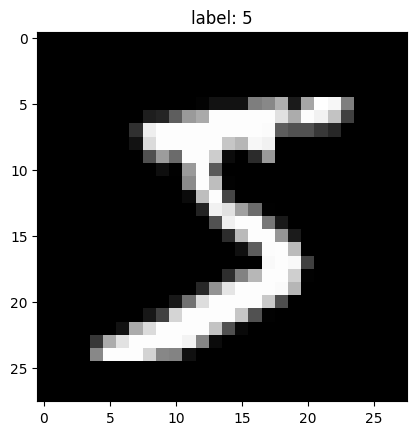

In [14]:
# MNIST 데이터 확인하기
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap='gray') # 3차원텐서를 2차원텐서로 줄이기위해서 squeeze()함수를 사용.
plt.title('label: %s' % label)
plt.show()

In [17]:
# 미니배치 구성하기

train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size=batch_size,
                                           shuffle=True)

# dataset : 미니배치로 구성할 데이터 , batch_size : 미니배치의 사이즈 , shuffle : 데이터의 순서를 랜덤으로 섞어서 미니배치를 구성할지 여부 결정

first_batch = train_loader.__iter__().__next__()
print('{:15s} | {:<25s} | {}'. format('name', 'type','size'))
print('{:15s} | {:<25s} | {}'. format('Num of Batch', '',len(train_loader)))
print('{:15s} | {:<25s} | {}'. format('first Batch', str(type(first_batch)),len(first_batch)))
print('{:15s} | {:<25s} | {}'. format('first Batch[0]', str(type(first_batch[0])),first_batch[0].shape))
print('{:15s} | {:<25s} | {}'. format('first Batch[1]', str(type(first_batch[1])),first_batch[1].shape))


name            | type                      | size
Num of Batch    |                           | 1200
first Batch     | <class 'list'>            | 2
first Batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first Batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


In [18]:
# CNN 구조 설계하기
class CNN(nn.Module):         # nn.module 클래스를 상속받는 cnn 클래스를 정의
  def __init__(self):         #__init__ 을 통해 모델에서 사용되는 가중치를 정의
    super(CNN,self).__init__()            # super()함수를 통해 nn.module클래스의 속성을 상속받고 초기화
    self.conv1 = nn.Conv2d(1,32,3,1)      # 첫번째 convolutional layer 인 conv1을 정의. in_channels(입력텐서채널크기), out_channels(출력텐서크기),kernel_size, stride이다.
    self.conv2 = nn.Conv2d(32,64,3,1)     # 두번째 conv layer 정의. conv1 의 out channel과 conv2의 in channel이 동일한지 확인필요
    self.dropout1 = nn.Dropout2d(0.25)     # 0.25 확률의  dropout1을 지정
    self.dropout2 = nn.Dropout2d(0.5)       #0.5 확률의 dropout2를 지정
    self.fc1 = nn.Linear(9216,128)          # fully connected layer인 fc1을 정의. in_features , out_features이다. 9216크기의 벡터를 128크기의 벡터로 변환하는 가중치
    self.fc2 = nn.Linear(128,10)            # 두번째 fc2를 정의. fc1에서 출력된 128 크기 벡터를 mnist 클래스 개수인 10 크기 벡터로 변환하는 가중치 설계


  def forward(self,x):                # 입력이미지와 정의한 가중치를 이용해 feed forward연산을 정의
    x = self.conv1(x)                 # 입력이미지를 conv1레이어에 통과
    x = F.relu(x)                     # relu 활성함수를 적용. 활성함수는 단순연산이므로  __init__에서 정의한 학습가중치는 없음.
    x = self.conv2(x)                 # conv2 레이어를 통과
    x = F.relu(x)                      # relu 활성함수를 적용
    x = F.max_pool2d(x,2)              # (2x2) max pooling을 적용. pooling layer는 단순연산이므로 학습할 가중치가 없음.
    x = self.dropout1(x)               # 사전에 정의한 0.25 확률의 dropout1을 반
    x = torch.flatten(x,1)              # torch.flatten함수를 통해 fully-connected layer를 통과하기전 고차원의 텐서를 1차원 벡터로 변환.
    x = self.fc1(x)                     # 9216크기의 벡터를 128크기의 벡터로 학습하는 fc1으로 통과
    x = F.relu(x)                       # relu활성함수를 적용
    x = self.dropout2(x)                #  0.5 확률의 dropout2를 반영
    x = self.fc2(x)                     # fc2를 통과하면서 벡터의 사이즈가 128에서 10으로 줄어듬
    output = F.log_softmax(x,dim=1)     # 최종출력값으로 log-softmax를 계산. softmax 말고 log_softmax를 사용해서 연산속도를 높일 수 있음.
    return output                       # 출력값 반환

In [19]:
#optimizer, 손실함수 정의
model = CNN().to(device)            # CNN 클래스를 이용해 model이라는 인스턴스를 생성. 코드상단에서 지정한 연산장비 device를 인식
optimizer = optim.Adam(model.parameters(), lr=learning_rate)            # 손실함수를 최소로하는 가중치를 찾기위해 Adam 알고리즘의 optimizer를 지정
criterion = nn.CrossEntropyLoss()                       # MNIST는 다중클래스 분류문제여서 교차엔트로피를 손실함수로 설정.

In [20]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [21]:
# 모델학습
model.train()
i=0
for epoch in range(epoch_num):
  for data, target in train_loader:   # train_loader에 있는 데이터와 정답값을 각각 data, target에 넣음
    data=data.to(device)              # data를 device에 넣음
    target=target.to(device)          # 정답값을 (target 값)을 device에 넣음
    optimizer.zero_grad()             # optimizer의 gradient값을 초기화
    output=model(data)                # 모델에 data값을 넣음.
    loss=criterion(output, target)          # 결과값과 정답값을 손실함수에 넣어서 계산
    loss.backward()                         # 손실함수를 통해 gradient 값을 계산
    optimizer.step()                        # 모델의 가중치를 업데이트
    if i % 1000 == 0:                        # 1000번째 시행마다 손실함수를 확인하기위한 if문
      print('train step:{}\tLoss: {:.3f}'.format(i,loss.item()))          #손실함수 출력
    i+=1                                            # 보조인덱스 1씩올려줌.

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


train step:0	Loss: 2.313
train step:1000	Loss: 0.328
train step:2000	Loss: 0.423
train step:3000	Loss: 0.126
train step:4000	Loss: 0.262
train step:5000	Loss: 0.168
train step:6000	Loss: 0.056
train step:7000	Loss: 0.175
train step:8000	Loss: 0.052
train step:9000	Loss: 0.038
train step:10000	Loss: 0.073
train step:11000	Loss: 0.021
train step:12000	Loss: 0.013
train step:13000	Loss: 0.023
train step:14000	Loss: 0.299
train step:15000	Loss: 0.017
train step:16000	Loss: 0.034
train step:17000	Loss: 0.008


In [22]:
# 모델평가
model.eval()      #평가모드를 실행. dropout이 적용안되고 batch-normalization도 평가모드로 전환
correct = 0       # 정답개수를 저장할 correct를 초기화
for data,target in test_loader:     #테스트데이터를 batch_Size로 나눈만큼 반복수행. test_loader는 매시행마다 미니배치의 데이터,정답을 data,target에 저장
  data = data.to(device)
  target = target.to(device)
  output = model(data)          # 미니배치의 데이터를 모델에 통과시켜 결과값계산
  prediction = output.data.max(1)[1]        # log-softmax값이 가장 큰 인덱스를 예측값으로 저장
  correct += prediction.eq(target.data).sum()         # 실제 정답값과 예측값이 같으면 true 다르면 false 논리값으로 구성된 벡터를 더함

print('Test set : Accuracy: {:.2f}%'. format(100*correct / len(test_loader.dataset)))

Test set : Accuracy: 99.01%
